<span style="background-color: #038C73; border-radius: 10px; padding: 10px; display: inline-block; font-family: cursive;">
    <div style="border-bottom: 5px solid #987654; border-top: 5px solid #987654; height: 30px; margin: 5px 0; transform: rotate(-2deg); border-radius: 0 20px 0 20px;"></div>
    <h2 style="text-align: center; font-size: 50px;">Volkwagen Online Sales In Turkey</h2>
    <p style="text-align: center; font-size: 20px;">Analysis and Visualizations. &#x1F4D1;</p>
    <div style="border-bottom: 5px solid #987654; border-top: 5px solid #987654; height: 30px; margin: 10px 0; transform: rotate(2deg); border-radius: 20px 0 20px 0;"></div>
</span>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('online_car-sales.csv',index_col=0)
cars.head()

,unnamed,customer_id,advertisement_number,brand,model,variant,year,kilometer,color,transmission,fuel,city,ad_date,price
0,89732,5e179871bc3087fa6cb10a21,777375802,Volkswagen,Golf,1.6 FSi Midline,2005,186.0,dark_red,manual,gasoline,Istanbul,2/28/2023,308.75 TL
1,89733,5e179871bc3087fa6cb10a22,777255310,Volkswagen,Golf,1.2 TSI Midline Plus,2016,13.6,red,manual,gasoline,Izmir,2/12/2023,705.25 TL
2,89734,5e179871bc3087fa6cb10a23,776963108,Volkswagen,Jetta,1.2 TSI Trendline,2012,108.0,white,manual,gasoline,Erzurum,2/23/2023,468.0 TL
3,89735,5e179871bc3087fa6cb10a24,776938945,Volkswagen,Jetta,1.4 TSI Comfortline,2008,157.0,blue,manual,gasoline,Kutahya,2/14/2023,422.5 TL
4,89736,5e179871bc3087fa6cb10a25,776932300,Volkswagen,Jetta,1.2 TSI Trendline,2012,127.0,silver_gray,manual,gasoline,Kutahya,2/1/2023,507.0 TL


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7600 entries, 0 to 7216
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unnamed               7600 non-null   int64  
 1   customer_id           7590 non-null   object 
 2   advertisement_number  7600 non-null   int64  
 3   brand                 7585 non-null   object 
 4   model                 7600 non-null   object 
 5   variant               7600 non-null   object 
 6   year                  7600 non-null   int64  
 7   kilometer             7599 non-null   float64
 8   color                 7600 non-null   object 
 9   transmission          7600 non-null   object 
 10  fuel                  7600 non-null   object 
 11  city                  7597 non-null   object 
 12  ad_date               7593 non-null   object 
 13  price                 7600 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 890.6+ KB


## observations
* we have to change the datatype of ad_date from object to datetime
* we have to change the datatype of price from object to float.
* we have missing data in customer_id,brand,kilometer,city and ad_date columns.
* we have to drop a few columns thus unnamed,customer_id,advertisement_number

In [4]:
cars.describe()

,unnamed,advertisement_number,year,kilometer
count,7600.000000,7.600000e+03,7600.000000,7599.000000
mean,93529.187105,7.698635e+08,2009.295658,157.105202
std,2190.270544,2.355947e+07,6.420218,85.190352
min,89732.000000,1.954600e+08,1974.000000,0.000000
25%,91631.750000,7.711791e+08,2004.000000,92.000000
50%,93531.500000,7.764830e+08,2011.000000,153.000000
75%,95431.250000,7.773369e+08,2014.000000,216.500000
max,97247.000000,7.778354e+08,2020.000000,980.000000


In [5]:
cars.isna().sum()

unnamed                  0
customer_id             10
advertisement_number     0
brand                   15
model                    0
variant                  0
year                     0
kilometer                1
color                    0
transmission             0
fuel                     0
city                     3
ad_date                  7
price                    0
dtype: int64

In [6]:
list(cars.columns)

['unnamed',
 'customer_id',
 'advertisement_number',
 'brand',
 'model',
 'variant',
 'year',
 'kilometer',
 'color',
 'transmission',
 'fuel',
 'city',
 'ad_date',
 'price']

In [7]:
cars.brand.unique()

array(['Volkswagen', nan], dtype=object)

In [8]:
cars['brand'].unique()

array(['Volkswagen', nan], dtype=object)

In [9]:
for col in list(cars.columns):
    print(col,cars[col].nunique())

unnamed 7516
customer_id 7533
advertisement_number 7508
brand 1
model 16
variant 191
year 40
kilometer 1375
color 16
transmission 3
fuel 4
city 82
ad_date 90
price 1311


In [10]:
cars.drop(['unnamed','advertisement_number','customer_id','brand'],axis=1,inplace=True)

In [11]:
cars.head()

,model,variant,year,kilometer,color,transmission,fuel,city,ad_date,price
0,Golf,1.6 FSi Midline,2005,186.0,dark_red,manual,gasoline,Istanbul,2/28/2023,308.75 TL
1,Golf,1.2 TSI Midline Plus,2016,13.6,red,manual,gasoline,Izmir,2/12/2023,705.25 TL
2,Jetta,1.2 TSI Trendline,2012,108.0,white,manual,gasoline,Erzurum,2/23/2023,468.0 TL
3,Jetta,1.4 TSI Comfortline,2008,157.0,blue,manual,gasoline,Kutahya,2/14/2023,422.5 TL
4,Jetta,1.2 TSI Trendline,2012,127.0,silver_gray,manual,gasoline,Kutahya,2/1/2023,507.0 TL


In [12]:
cars['ad_date'] = pd.to_datetime(cars.ad_date)

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7600 entries, 0 to 7216
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   model         7600 non-null   object        
 1   variant       7600 non-null   object        
 2   year          7600 non-null   int64         
 3   kilometer     7599 non-null   float64       
 4   color         7600 non-null   object        
 5   transmission  7600 non-null   object        
 6   fuel          7600 non-null   object        
 7   city          7597 non-null   object        
 8   ad_date       7593 non-null   datetime64[ns]
 9   price         7600 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 653.1+ KB


In [14]:
cars['price'] = cars.price.str.strip('TL').astype(float)*1000

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7600 entries, 0 to 7216
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   model         7600 non-null   object        
 1   variant       7600 non-null   object        
 2   year          7600 non-null   int64         
 3   kilometer     7599 non-null   float64       
 4   color         7600 non-null   object        
 5   transmission  7600 non-null   object        
 6   fuel          7600 non-null   object        
 7   city          7597 non-null   object        
 8   ad_date       7593 non-null   datetime64[ns]
 9   price         7600 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 653.1+ KB


In [16]:
cars.isna().sum()

model           0
variant         0
year            0
kilometer       1
color           0
transmission    0
fuel            0
city            3
ad_date         7
price           0
dtype: int64

In [17]:
cars.dropna(inplace=True)

In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 0 to 7216
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   model         7590 non-null   object        
 1   variant       7590 non-null   object        
 2   year          7590 non-null   int64         
 3   kilometer     7590 non-null   float64       
 4   color         7590 non-null   object        
 5   transmission  7590 non-null   object        
 6   fuel          7590 non-null   object        
 7   city          7590 non-null   object        
 8   ad_date       7590 non-null   datetime64[ns]
 9   price         7590 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 652.3+ KB


In [19]:
cars.model.unique()

array(['Golf', 'Jetta', 'Passat', 'Polo', 'Beetle', 'EOS', 'Bora',
       'Scirocco', 'VW CC', 'Touran', 'Lupo', 'Passat Variant', 'Arteon',
       'Phaeton', 'Vento', 'Sharan'], dtype=object)

In [20]:
model = pd.DataFrame(cars.model.value_counts()).head(5)
model.head()

,model
Passat,2324
Polo,1626
Golf,1446
Jetta,1103
Bora,390


In [21]:
cars.model.value_counts()

Passat            2324
Polo              1626
Golf              1446
Jetta             1103
Bora               390
VW CC              376
Scirocco           123
Beetle              69
Passat Variant      54
Touran              28
Arteon              24
Phaeton             11
Vento                6
Lupo                 4
EOS                  3
Sharan               3
Name: model, dtype: int64

In [22]:
sns.set_style('darkgrid')

In [23]:
model

,model
Passat,2324
Polo,1626
Golf,1446
Jetta,1103
Bora,390


In [24]:
import matplotlib

In [25]:
matplotlib.rcParams['font.size']=14

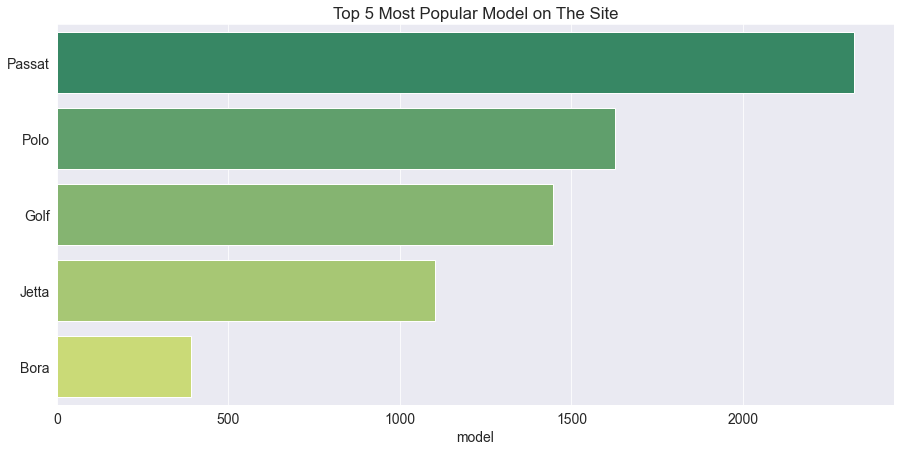

In [26]:
plt.figure(figsize=(15,7))
sns.barplot(data= model, y=model.index,x='model',orient='h',palette='summer')
plt.title('Top 5 Most Popular Model on The Site');

In [27]:
cars.columns

Index(['model', 'variant', 'year', 'kilometer', 'color', 'transmission',
       'fuel', 'city', 'ad_date', 'price'],
      dtype='object')

In [28]:
cars.transmission.unique()

array(['manual', 'semi-automatic', 'automatic'], dtype=object)

In [29]:
cars.transmission.value_counts()

manual            2998
semi-automatic    2381
automatic         2211
Name: transmission, dtype: int64

In [30]:
transmission = pd.DataFrame(cars.transmission.value_counts())

In [31]:
transmission

,transmission
manual,2998
semi-automatic,2381
automatic,2211


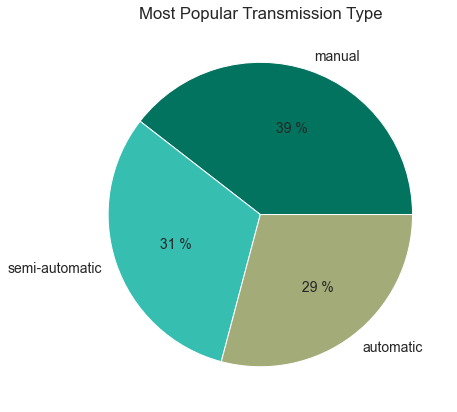

In [32]:
plt.figure(figsize=(7,7))
plt.pie(transmission['transmission'],
        labels=transmission.index,autopct='% .0f %%',
       colors=['#02735E','#36BFB1','#A3AB78'])
plt.title('Most Popular Transmission Type');
#plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05));

In [33]:
cars.fuel.value_counts()

gasoline        2767
diesel          2441
gasoline&gas    2381
Hybrid             1
Name: fuel, dtype: int64

In [34]:
fuel = pd.DataFrame(cars.fuel.value_counts())

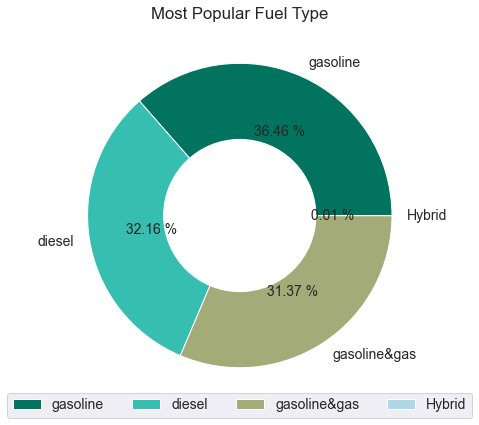

In [35]:
plt.figure(figsize=(7,7))
plt.pie(fuel['fuel'],radius=1,
        labels=fuel.index,autopct='% .2f %%',
       colors=['#02735E','#36BFB1','#A3AB78','lightblue'],
    )
plt.title('Most Popular Fuel Type')
plt.pie([100],radius=.5,colors=['white'])
plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05));

In [36]:
cars.year.describe()

count    7590.000000
mean     2009.297628
std         6.420302
min      1974.000000
25%      2004.000000
50%      2011.000000
75%      2014.000000
max      2020.000000
Name: year, dtype: float64

In [37]:
def model_year(x):
    if x < 2000:
        return 'old'
    elif x < 2011:
        return 'fairly new'
    else:
        return 'New'

In [38]:
model_year(1820)

'old'

In [39]:
model_year(2002)

'fairly new'

In [40]:
model_year(2020)

'New'

In [41]:
cars['model_age'] = cars.year.apply(model_year)
cars.head()

,model,variant,year,kilometer,color,transmission,fuel,city,ad_date,price,model_age
0,Golf,1.6 FSi Midline,2005,186.0,dark_red,manual,gasoline,Istanbul,2023-02-28,308750.0,fairly new
1,Golf,1.2 TSI Midline Plus,2016,13.6,red,manual,gasoline,Izmir,2023-02-12,705250.0,New
2,Jetta,1.2 TSI Trendline,2012,108.0,white,manual,gasoline,Erzurum,2023-02-23,468000.0,New
3,Jetta,1.4 TSI Comfortline,2008,157.0,blue,manual,gasoline,Kutahya,2023-02-14,422500.0,fairly new
4,Jetta,1.2 TSI Trendline,2012,127.0,silver_gray,manual,gasoline,Kutahya,2023-02-01,507000.0,New


In [42]:
cars.kilometer.describe()

count    7590.000000
mean      157.015867
std        85.137911
min         0.000000
25%        92.000000
50%       153.000000
75%       216.287500
max       980.000000
Name: kilometer, dtype: float64

In [43]:
def kilo(x):
    if x < 200:
        return 'fairly used'
    elif x < 400:
        return 'used'
    else:
        return 'overly used'
    

In [44]:
kilo(111)

'fairly used'

In [45]:
kilo(300)

'used'

In [46]:
kilo(433)

'overly used'

In [47]:
cars['usage'] = cars.kilometer.apply(kilo)
cars.head()

,model,variant,year,kilometer,color,transmission,fuel,city,ad_date,price,model_age,usage
0,Golf,1.6 FSi Midline,2005,186.0,dark_red,manual,gasoline,Istanbul,2023-02-28,308750.0,fairly new,fairly used
1,Golf,1.2 TSI Midline Plus,2016,13.6,red,manual,gasoline,Izmir,2023-02-12,705250.0,New,fairly used
2,Jetta,1.2 TSI Trendline,2012,108.0,white,manual,gasoline,Erzurum,2023-02-23,468000.0,New,fairly used
3,Jetta,1.4 TSI Comfortline,2008,157.0,blue,manual,gasoline,Kutahya,2023-02-14,422500.0,fairly new,fairly used
4,Jetta,1.2 TSI Trendline,2012,127.0,silver_gray,manual,gasoline,Kutahya,2023-02-01,507000.0,New,fairly used


In [48]:
# set the display format to show numbers in a normal format
pd.options.display.float_format = '{:,.2f}'.format

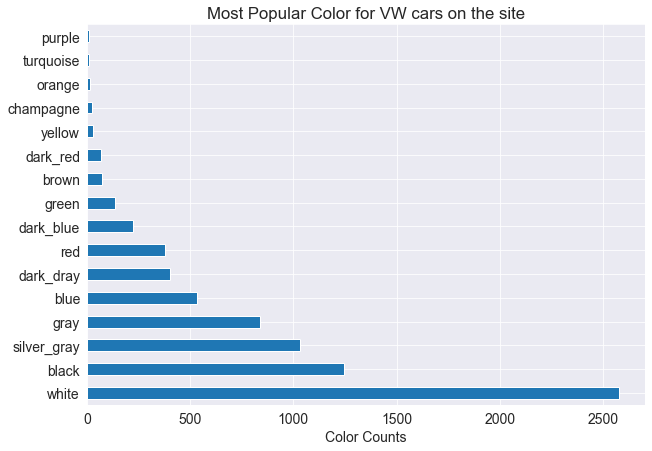

In [49]:
plt.figure(figsize=(10,7))
plt.title('Most Popular Color for VW cars on the site')
cars.color.value_counts().plot(kind='barh')
plt.xlabel('Color Counts');

In [50]:
model_price = pd.DataFrame(cars.groupby('model')['price'].median()).reset_index()

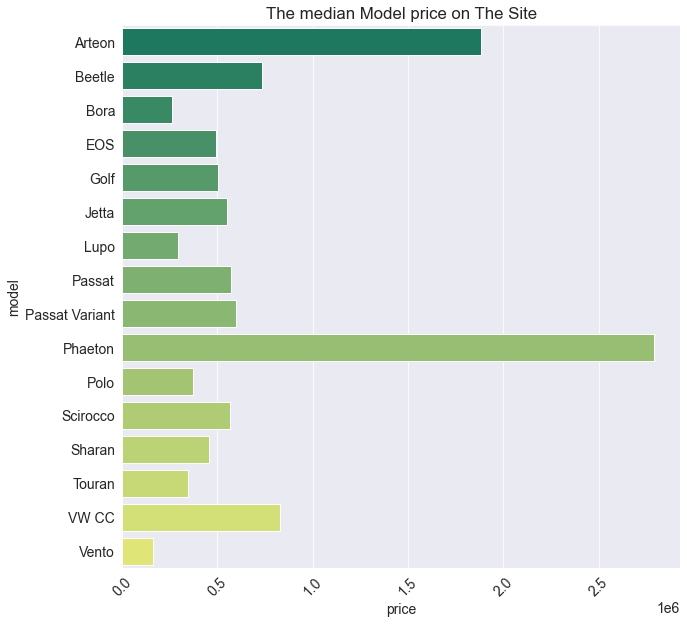

In [51]:
plt.figure(figsize=(10,10))
sns.barplot(data= model_price, x='price',y='model',orient='h',palette='summer')
plt.title('The median Model price on The Site')
plt.xticks(rotation=45);

In [52]:
fuel_price = pd.DataFrame(cars.groupby('fuel')['price'].median()).reset_index()

In [53]:
fuel_price

,fuel,price
0,Hybrid,"227,500.00"
1,diesel,"666,250.00"
2,gasoline,"625,625.00"
3,gasoline&gas,"289,250.00"


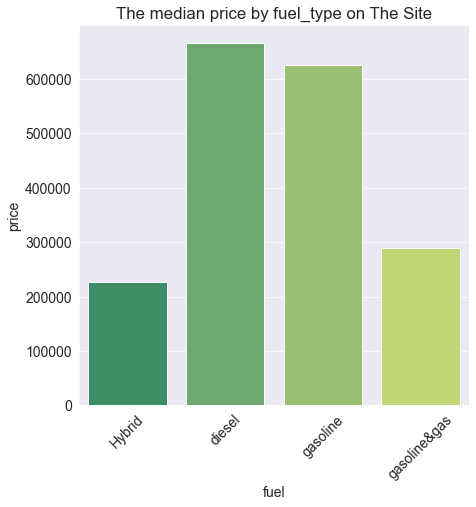

In [54]:
plt.figure(figsize=(7,7))
sns.barplot(data= fuel_price, y='price',x='fuel',palette='summer')
plt.title('The median price by fuel_type on The Site')
plt.xticks(rotation=45);

In [55]:
cars.groupby('model')['price'].median()

model
Arteon           1,883,050.00
Beetle             732,875.00
Bora               259,993.50
EOS                492,375.00
Golf               503,750.00
Jetta              552,500.00
Lupo               291,687.50
Passat             572,000.00
Passat Variant     597,675.00
Phaeton          2,788,500.00
Polo               373,750.00
Scirocco           568,750.00
Sharan             455,000.00
Touran             345,312.50
VW CC              830,375.00
Vento              164,125.00
Name: price, dtype: float64

In [56]:
trans_price = pd.DataFrame(cars.groupby('transmission')['price'].median()).reset_index()

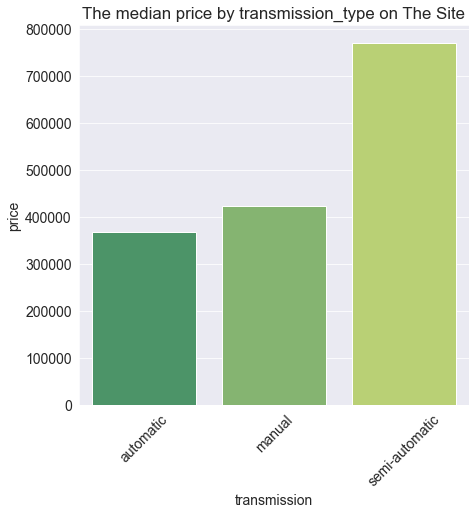

In [57]:
plt.figure(figsize=(7,7))
sns.barplot(data= trans_price, y='price',x='transmission',palette='summer')
plt.title('The median price by transmission_type on The Site')
plt.xticks(rotation=45);

In [58]:
city_price_expensive = pd.DataFrame(cars.groupby('city')['price'].median().sort_values(ascending=False)).reset_index().head(10)

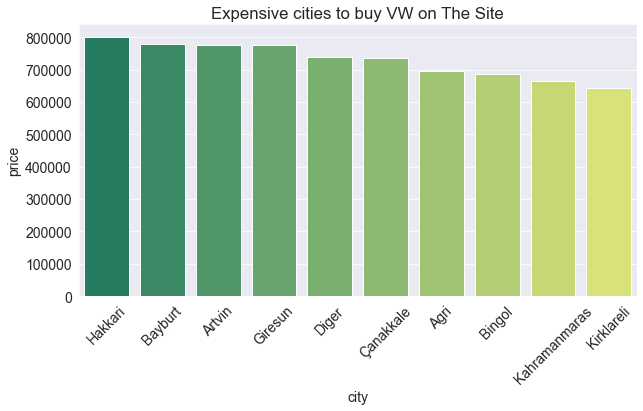

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(data= city_price_expensive, y='price',x='city',palette='summer')
plt.title('Expensive cities to buy VW on The Site')
plt.xticks(rotation=45);

In [60]:
city_price_affordable = pd.DataFrame(cars.groupby('city')['price'].median()
                                     .sort_values(ascending=False)).reset_index().tail(10)

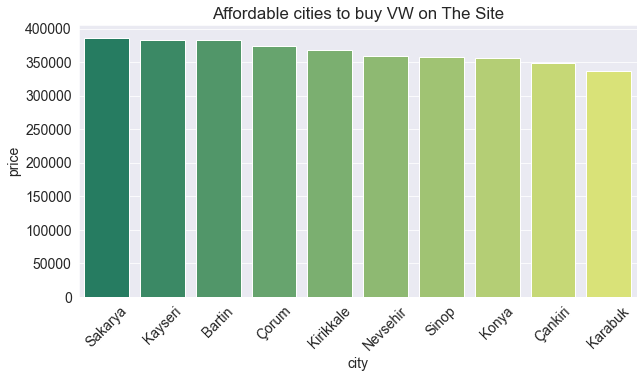

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(data= city_price_affordable, y='price',x='city',palette='summer')
plt.title('Affordable cities to buy VW on The Site')
plt.xticks(rotation=45);

In [62]:
model_age_price = pd.DataFrame(cars.groupby('model_age')['price'].median()).reset_index()

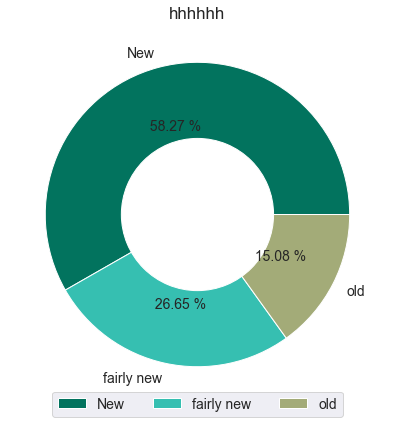

In [63]:
plt.figure(figsize=(7,7))
plt.pie(model_age_price['price'],radius=1,
        labels=model_age_price['model_age'],autopct='% .2f %%',
       colors=['#02735E','#36BFB1','#A3AB78'],
    )
plt.title('hhhhhh')
plt.pie([100],radius=.5,colors=['white'])
plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05));

In [64]:
usage_price = pd.DataFrame(cars.groupby('usage')['price'].median()).reset_index()

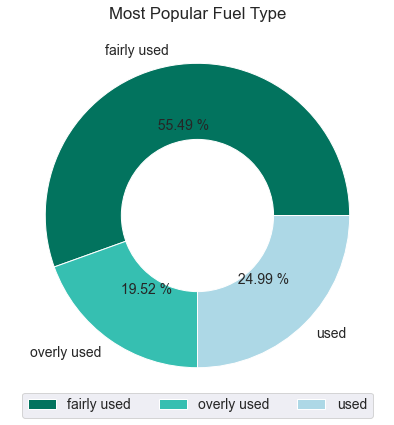

In [65]:
plt.figure(figsize=(7,7))
plt.pie(usage_price['price'],radius=1,
        labels=usage_price['usage'],autopct='% .2f %%',
       colors=['#02735E','#36BFB1','lightblue'],
    )
plt.title('Most Popular Fuel Type')
plt.pie([100],radius=.5,colors=['white'])
plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05));

In [66]:
cars['engine_spec'] = cars.variant.str.split(' ',expand=True)[1] + ' '+ cars.variant.str.split(' ',expand=True)[2]

In [67]:
cars.head()

,model,variant,year,kilometer,color,transmission,fuel,city,ad_date,price,model_age,usage,engine_spec
0,Golf,1.6 FSi Midline,2005,186.00,dark_red,manual,gasoline,Istanbul,2023-02-28,"308,750.00",fairly new,fairly used,FSi Midline
1,Golf,1.2 TSI Midline Plus,2016,13.60,red,manual,gasoline,Izmir,2023-02-12,"705,250.00",New,fairly used,TSI Midline
2,Jetta,1.2 TSI Trendline,2012,108.00,white,manual,gasoline,Erzurum,2023-02-23,"468,000.00",New,fairly used,TSI Trendline
3,Jetta,1.4 TSI Comfortline,2008,157.00,blue,manual,gasoline,Kutahya,2023-02-14,"422,500.00",fairly new,fairly used,TSI Comfortline
4,Jetta,1.2 TSI Trendline,2012,127.00,silver_gray,manual,gasoline,Kutahya,2023-02-01,"507,000.00",New,fairly used,TSI Trendline


In [68]:
cheap_engine_spec = pd.DataFrame(cars.groupby('engine_spec')['price'].median()).reset_index().sort_values(by='price').head()

In [69]:
expensive_engine_spec = pd.DataFrame(cars.groupby('engine_spec')['price'].median()).reset_index().sort_values(by='price').tail()

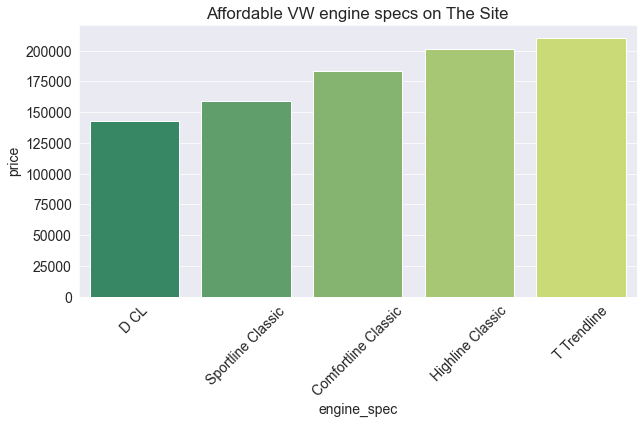

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(data= cheap_engine_spec, y='price',x='engine_spec',palette='summer')
plt.title('Affordable VW engine specs on The Site')
plt.xticks(rotation=45);

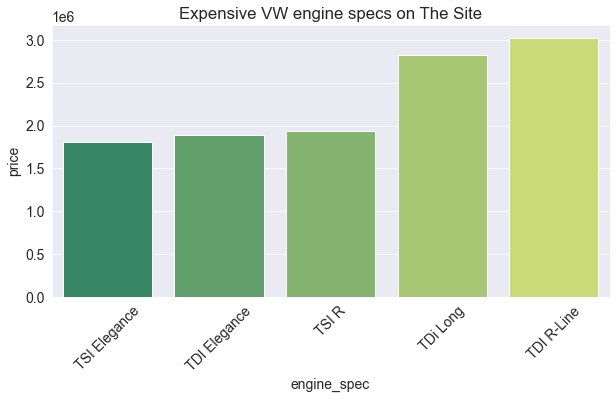

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(data= expensive_engine_spec, y='price',x='engine_spec',palette='summer')
plt.title('Expensive VW engine specs on The Site')
plt.xticks(rotation=45);